In [4]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from helper import *
import os
from rsa import RSA

In [5]:
with open('config.json') as config_file:
    config = json.load(config_file)
data_path = config['data_path']

file_id: 1
/scratch2/hle/refCOCO/test/imgs_by_id/169820.jpg
{'ref_sents': ['cat', 'Cat on right', 'cat, but not in reflection'], 'label': 17, 'bbox': [[45.70000076293945, 70.13999938964844, 332.0, 221.10000610351562]]}


,box_alias,image_id,ann_id,ref_id,salience,x1,y1,w,h,TYPE_yolk,...,ATTR_thin,ATTR_decorative,ATTR_wrinkled,ATTR_peeling,ATTR_golden,ATTR_metallic,ATTR_back,ATTR_thick,ATTR_black and white,ATTR_leaning
0,cat-1,169820,46375,35499,0.096320,29.428690,82.913445,116.503242,137.654572,0.000624,...,0.002494,0.002493,0.002493,0.002493,0.002494,0.002493,0.002499,0.002495,0.002503,0.002494
1,tail-1,169820,46375,35499,0.019117,440.889801,153.144791,54.440521,58.466034,0.000624,...,0.002497,0.002493,0.002495,0.002493,0.002494,0.002493,0.002524,0.002508,0.002497,0.002493
2,cat-2,169820,46375,35499,0.297689,182.072052,84.467247,255.985809,193.624573,0.000624,...,0.002494,0.002494,0.002495,0.002493,0.002494,0.002493,0.002495,0.002495,0.002496,0.002494
3,head-1,169820,46375,35499,0.053074,30.695189,70.197906,96.414406,91.655350,0.000624,...,0.002495,0.002494,0.002494,0.002493,0.002494,0.002493,0.002505,0.002496,0.002509,0.002494
4,pillow-1,169820,46375,35499,0.163228,61.365448,2.605297,248.645721,109.302063,0.000624,...,0.002494,0.002500,0.002497,0.002493,0.002493,0.002493,0.002494,0.002495,0.002495,0.002493
5,couch-1,169820,46375,35499,0.333378,0.000000,0.000000,274.513092,202.203278,0.000624,...,0.002494,0.002495,0.002495,0.002493,0.002493,0.002493,0.002496,0.002495,0.002497,0.002493
6,carpet-1,169820,46375,35499,0.405482,23.495625,158.410049,386.693634,174.589951,0.000624,...,0.002494,0.002494,0.002496,0.002493,0.002494,0.002494,0.002496,0.002497,0.002495,0.002493
7,dog-1,169820,46375,35499,0.411673,143.503433,43.046642,342.138428,200.338470,0.000624,...,0.002494,0.002494,0.002495,0.002494,0.002495,0.002494,0.002495,0.002495,0.002498,0.002494
8,floor-1,169820,46375,35499,0.329801,176.711578,0.322388,323.288422,169.854218,0.000624,...,0.002495,0.002495,0.002495,0.002494,0.002494,0.002494,0.002496,0.002496,0.002495,0.002494
9,table-1,169820,46375,35499,0.024241,428.639069,6.350880,71.360931,56.559849,0.000624,...,0.002493,0.002494,0.002493,0.002493,0.002493,0.002498,0.002494,0.002494,0.002494,0.002493


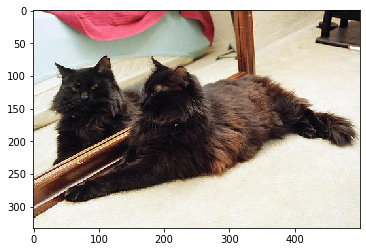

In [10]:
file_id = 1#200#19
print(f'file_id: {file_id}')
df = pd.read_csv(os.path.join(data_path,f'refCOCO/test/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
img_id = df['image_id'][0]
filename = os.path.join(data_path, f'refCOCO/test/imgs_by_id/{img_id}.jpg')
print(filename)
image = plt.imread(filename)
plt.imshow(image)
with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{file_id}.json')) as json_file:
    label = json.load(json_file)
print(label)

df

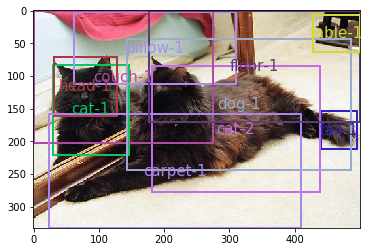

In [11]:
box_data = df[['box_alias', 'x1','y1','w','h']]
fig,ax = plt.subplots(1)
img = image

ax.imshow(img)
rng = [i for i in range(len(box_data))]
for i in rng[:]:
    name, x,y,w,h = list(box_data.iloc[i,:])
    ax,_ = draw_box_obj(name,x,y,w,h,img,ax)

['cat', 'Cat on right', 'cat, but not in reflection']


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6eed39ac10>,
 array([0.93757531, 0.53343358, 0.45746145]))

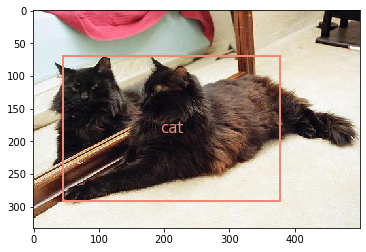

In [12]:
# DRAWING THE BOX OF THE TRUE LABEL AND PRINT THE TRUE LABELS (REFCOCO)
print(label['ref_sents'])
bbox = label['bbox'][0]
sentence = label['ref_sents'][0]
fig,ax_true_label = plt.subplots(1)
ax_true_label.imshow(img)
draw_box_obj(sentence,bbox[0],bbox[1],bbox[2],bbox[3],img,ax_true_label)

In [6]:
# RETURN THE TOP 5 MATCH TO THE TARGET LABEL
top_5 = top_5_match(box_data, bbox)
print(top_5)

[[7, 'cow-1', 0.6728181580932334], [11, 'fur-1', 0.4221080622028027], [12, 'back-1', 0.33784256480713637], [5, 'dog-1', 0.2120996541705207], [6, 'head-1', 0.09293568218180233]]


In [17]:
synsets = wordnet.synsets('cow')
synonyms = []
for syn in synsets:
    for l in syn.lemmas(): 
        synonyms.append(l.name())
print(synonyms)

['cow', 'moo-cow', 'cow', 'cow', 'overawe', 'cow']


In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/grad3/hle/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
rel_load = np.load(f'./test_relation_extraction.npy', allow_pickle=True)

In [6]:
def calc_expression(start=0, end=5, k=3):
    matched_label = np.load('test_imgs_label_matching.npy', allow_pickle=True)

    exps = []
    references = []
    for i in range(start, end):
        df = pd.read_csv(os.path.join(data_path,f'refCOCO/test/attr_tables/attr_{i}.tsv'), encoding='utf-8',sep='\t')

        # UNCOMMENT TO SAVE THE REFERENCES OF THE SAME RANGE AS THE PROCESSED IMAGES
        with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{i}.json')) as json_file:
            label = json.load(json_file)
        refs = [[r] for r in label['ref_sents']]
        references.append(refs)
        generated_relations = rel_load[i]
        rsa_agent = RSA(df, generated_relations=generated_relations)
        targets = [matched_label[i][j][1] for j in range(min(k, len(matched_label[i])))]
        word_lists = [rsa_agent.full_speaker(target) for target in targets]
        expression = [' '.join(word_lists[j][::-1]) for j in range(len(word_lists))]
        exps.append(expression)
        if i % 50 == 0:
            print(f'finished file {i}')

    np.save(f'./data/top{k}_exps_from_{start}_to_{end}.npy',exps)
    # UNCOMMENT TO SAVE THE REFERENCES OF THE SAME RANGE AS THE PROCESSED IMAGES
    np.save(f'./data/references_from_{start}_to_{end}.npy',references)


In [7]:
calc_expression(0, 2, 3)

/scratch2/hle/git/rsa_refer/rsa.py:122: RuntimeWarning: invalid value encountered in true_divide
  return result/np.sum(result)


finished file 0
[['sidewalk', 'man', 'red ground'], ['carpet', 'the right cat', 'dog']]


In [48]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

[[8, 'people-1', 0.5377745153533279], [19, 'men-1', 0.35485872789685285], [12, 'ground-1', 0.3360502787620126], [2, 'man-2', 0.2502535797858742], [20, 'vest-2', 0.1620584473462549]]
['guy closest to us', 'first guy sitting, right', 'stretched out legs']


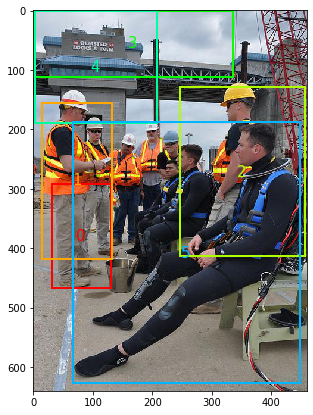

In [51]:
box_data = df[['box_alias', 'x1','y1','w','h']]
bbox = label['bbox'][0]
top_5 = top_5_match(box_data, bbox)
print(top_5)
removed_boxes = [box[1] for box in top_5 if box[2] > 0.5]
fig,ax = plt.subplots(1, figsize=(7,7))
img = image
colors = get_cmap(10)
ax.imshow(img)
rng = [i for i in range(len(box_data))]
counter = 0
for i in rng[:]:
    if counter >=5:
        break
    name, x,y,w,h = list(box_data.iloc[i,:])
    if name in removed_boxes:
        continue
    ax,color = draw_box_obj(str(counter),x,y,w,h,img,ax,color=colors(counter))
    counter += 1
    
# DRAWING THE BOX OF THE TRUE LABEL AND PRINT THE TRUE LABELS (REFCOCO)
print(label['ref_sents'])

sentence = label['ref_sents'][0]
ax, color = draw_box_obj(str(counter),bbox[0],bbox[1],bbox[2],bbox[3],img,ax, color=colors(counter))
fig.savefig('foo1.png')

file_id: 0
/scratch2/hle/refCOCO/test/imgs_by_id/296747.jpg
['guy petting elephant', 'foremost person', 'green shirt']
file_id: 1
/scratch2/hle/refCOCO/test/imgs_by_id/169820.jpg
['cat', 'Cat on right', 'cat, but not in reflection']


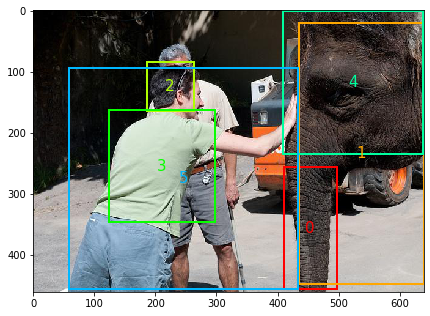

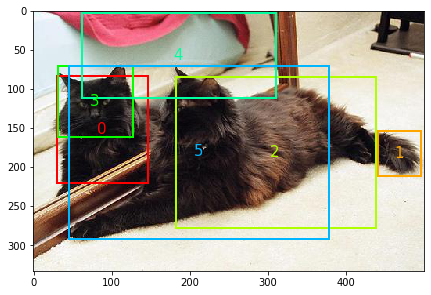

In [52]:
for file_id in range(2):
    print(f'file_id: {file_id}')
    df = pd.read_csv(os.path.join(data_path,f'refCOCO/test/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
    img_id = df['image_id'][0]
    filename = os.path.join(data_path, f'refCOCO/test/imgs_by_id/{img_id}.jpg')
    print(filename)
    image = plt.imread(filename)
    with open(os.path.join(data_path,f'refCOCO/test/labels/lab_{file_id}.json')) as json_file:
        label = json.load(json_file)
    box_data = df[['box_alias', 'x1','y1','w','h']]
    bbox = label['bbox'][0]
    top_5 = top_5_match(box_data, bbox)
    removed_boxes = [box[1] for box in top_5 if box[2] > 0.5]
    fig,ax = plt.subplots(1, figsize=(7,7))
    img = image
    colors = get_cmap(10)
    ax.imshow(img)
    rng = [i for i in range(len(box_data))]
    counter = 0
    for i in rng[:]:
        if counter >=5:
            break
        name, x,y,w,h = list(box_data.iloc[i,:])
        if name in removed_boxes:
            continue
        ax,color = draw_box_obj(str(counter),x,y,w,h,img,ax,color=colors(counter))
        counter += 1

    # DRAWING THE BOX OF THE TRUE LABEL AND PRINT THE TRUE LABELS (REFCOCO)
    print(label['ref_sents'])

    sentence = label['ref_sents'][0]
    ax, color = draw_box_obj(str(counter),bbox[0],bbox[1],bbox[2],bbox[3],img,ax, color=colors(counter))
    fig.savefig(f'foo{file_id}.png')
    

In [7]:
dir(colors)

['N',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gamma',
 '_i_bad',
 '_i_over',
 '_i_under',
 '_init',
 '_isinit',
 '_lut',
 '_resample',
 '_rgba_bad',
 '_rgba_over',
 '_rgba_under',
 '_segmentdata',
 '_set_extremes',
 'colorbar_extend',
 'from_list',
 'is_gray',
 'monochrome',
 'name',
 'reversed',
 'set_bad',
 'set_gamma',
 'set_over',
 'set_under']

In [19]:
distinct_colors = [colors(i) for i in range(10)]

In [20]:
distinct_colors

[(1.0, 0.0, 0.0, 1.0),
 (1.0, 0.6562506562506562, 0.0, 1.0),
 (0.6874986874986876, 1.0, 0.0, 1.0),
 (0.031249343749343756, 1.0, 1.31250131249048e-06, 1.0),
 (0.0, 1.0, 0.6249990812548694, 1.0),
 (0.0, 0.718752625002625, 1.0, 1.0),
 (0.0, 0.062501968751969, 1.0, 1.0),
 (0.5937486874986869, 0.0, 1.0, 1.0),
 (1.0, 0.0, 0.750000656250656, 1.0),
 (1.0, 0.0, 0.09375, 1.0)]

In [35]:
x = colors([0,1,2,3,4,5])[np.newaxis, :, :3]

TypeError: 'numpy.float64' object is not iterable

In [20]:
out = []
for file_id in range(40000):
    df = pd.read_csv(os.path.join(data_path,f'refCOCO/train/attr_tables/attr_{file_id}.tsv'), encoding='utf-8',sep='\t')
    with open(os.path.join(data_path,f'refCOCO/train/labels/lab_{file_id}.json')) as json_file:
        label = json.load(json_file)
    bbox = label['bbox'][0]
    box_data = df[['box_alias', 'x1','y1','w','h']]
    out.append(top_5_match(box_data, bbox))
    if file_id % 500 == 0:
        print(f'done matching {file_id} images')

np.save('train_imgs_label_matching.npy',out)
print(f'file saved at train_imgs_label_matching.npy')


done matching 0 images
done matching 500 images
done matching 1000 images
done matching 1500 images
done matching 2000 images
done matching 2500 images
done matching 3000 images
done matching 3500 images
done matching 4000 images
done matching 4500 images
done matching 5000 images
done matching 5500 images
done matching 6000 images
done matching 6500 images
done matching 7000 images
done matching 7500 images
done matching 8000 images
done matching 8500 images
done matching 9000 images
done matching 9500 images
done matching 10000 images
done matching 10500 images
done matching 11000 images
done matching 11500 images
done matching 12000 images
done matching 12500 images
done matching 13000 images
done matching 13500 images
done matching 14000 images
done matching 14500 images
done matching 15000 images
done matching 15500 images
done matching 16000 images
done matching 16500 images
done matching 17000 images
done matching 17500 images
done matching 18000 images
done matching 18500 image